In [1]:
import seaborn as sns
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
sns.set()
sns.set_theme(style="white", font='Times New Roman',font_scale=1.4)
plt.rcParams['font.sans-serif'] = 'Times New Roman'
%matplotlib inline

data_path='./data/raw_data2020.p'
dataPoolfont_sizefont_size = pickle.load(open(data_path, "rb" ) )

font_size = 20

**List of data collected from one sampler** 

| Data Type               | Data |
| -----------             | ----------- |
| Head-Tracking Data      | Raw Head Position(i.e., x, y and z) <br> Resampled Head Position(i.e., x, y and z) <br> Head Rotation(i.e., x, y and z) <br> Resampled Head Rotation(i.e., x, y and z) |
| Motion Data             | Raw Speed <br> Resampled Speed <br> Raw Rotation <br> Resampled Rotation     |
| Biosignal Data          | Galvanic Skin Response(4Hz) <br> Blood Volume Pulse(64Hz) <br> Heart Rate() <br> Temperature(4Hz)     |
| CyberSickness Data      | Simulator Sickness Questionnaire Score <br> Nausea Score <br> Oculomotor Score <br> Disorientation Score     |


## Data Component

In [2]:
name = list(dataPoolfont_sizefont_size.keys())[0]
one_sample = dataPoolfont_sizefont_size[name]
print(vars(one_sample))
print(vars(one_sample.SicknessLevel))
print(vars(one_sample.Steam))
print(vars(one_sample.Empatica))

{'Name': 'Andreas', 'Order': 'group1.5', 'SicknessLevel': <createDataset.Questionnaire object at 0x7f118003bdc0>, 'Steam': <createDataset.steamVR object at 0x7f10df4335b0>, 'Empatica': <createDataset.E4 object at 0x7f10df456ee0>}
{'SSQ': 33.660000000000004, 'Nausea': 38.16, 'Oculomotor': 15.16, 'Disorientation': 41.76}
{'rawHead':              Time   local_X   local_Y   local_Z  local_EulerAngles_X  \
1        0.000000  1.391103  1.724968  0.602513             8.167149   
2        0.020000  1.415239  1.734788  0.551443           359.534600   
3        0.084569  1.415962  1.734392  0.552461           359.827100   
4        0.134371  1.416795  1.733580  0.554464             0.401583   
5        0.163161  1.417007  1.733005  0.555336             0.791449   
...           ...       ...       ...       ...                  ...   
19407  239.967100  1.345868  1.700909  0.596120             6.358425   
19408  239.977000  1.346087  1.700988  0.596239             6.331816   
19409  239.988000  

## Analyze whole distribution

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


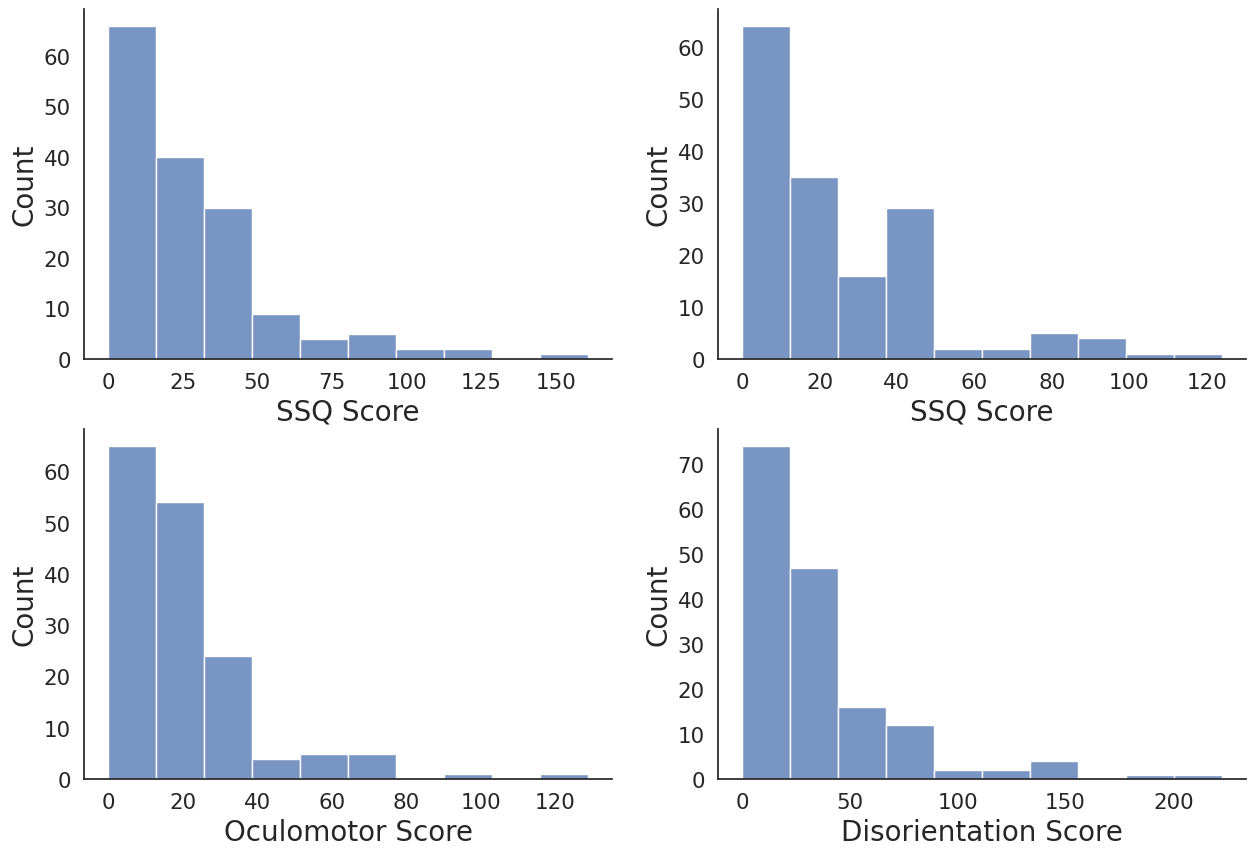

In [3]:
## Whole distribution of CyberSickness Data
## Score distribution of 159 samplers
SSQs, Nauseas, Oculomotors, Disorientations = [], [], [], []
for key, values in tqdm(dataPoolfont_sizefont_size.items(),disable=True):
    SSQs.append(values.SicknessLevel.SSQ)
    Nauseas.append(values.SicknessLevel.Nausea)
    Oculomotors.append(values.SicknessLevel.Oculomotor)
    Disorientations.append(values.SicknessLevel.Disorientation)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(SSQs, bins=10, label='SSQ')
plt.xlabel("SSQ Score", fontsize=font_size)
plt.ylabel("Count", fontsize=font_size)

plt.subplot(2, 2, 2)
sns.histplot(Nauseas, bins=10, label='Nausea')
plt.xlabel("SSQ Score", fontsize=font_size)
plt.ylabel("Count", fontsize=font_size)


plt.subplot(2, 2, 3)
sns.histplot(Oculomotors, bins=10, label='Oculomotor')
plt.xlabel("Oculomotor Score", fontsize=font_size)
plt.ylabel("Count", fontsize=font_size)

plt.subplot(2, 2, 4)
sns.histplot(Disorientations, bins=10, label='Disorientation')
plt.xlabel("Disorientation Score", fontsize=font_size)
plt.ylabel("Count", fontsize=font_size)

sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('./fig_whole_dis.jpg')

## Analyze one sample

In [4]:
x = one_sample.Steam.rawHead.Time
d1 = {"time": x, "position_x": list(one_sample.Steam.rawHead.local_X)}
d1 = pd.DataFrame(d1)
d2 = {"time": x, "position_y": list(one_sample.Steam.rawHead.local_Y)}
d2 = pd.DataFrame(d2)
d3 = {"time": x, "position_z": list(one_sample.Steam.rawHead.local_Z)}
d3 = pd.DataFrame(d3)
d4 = {"time": x, "rotation_x": list(one_sample.Steam.rawHead.local_EulerAngles_X)}
d4 = pd.DataFrame(d4)
d5 = {"time": x, "rotation_y": list(one_sample.Steam.rawHead.local_EulerAngles_Y)}
d5 = pd.DataFrame(d5)
d6 = {"time": x, "rotation_z": list(one_sample.Steam.rawHead.local_EulerAngles_Z)}
d6 = pd.DataFrame(d6)


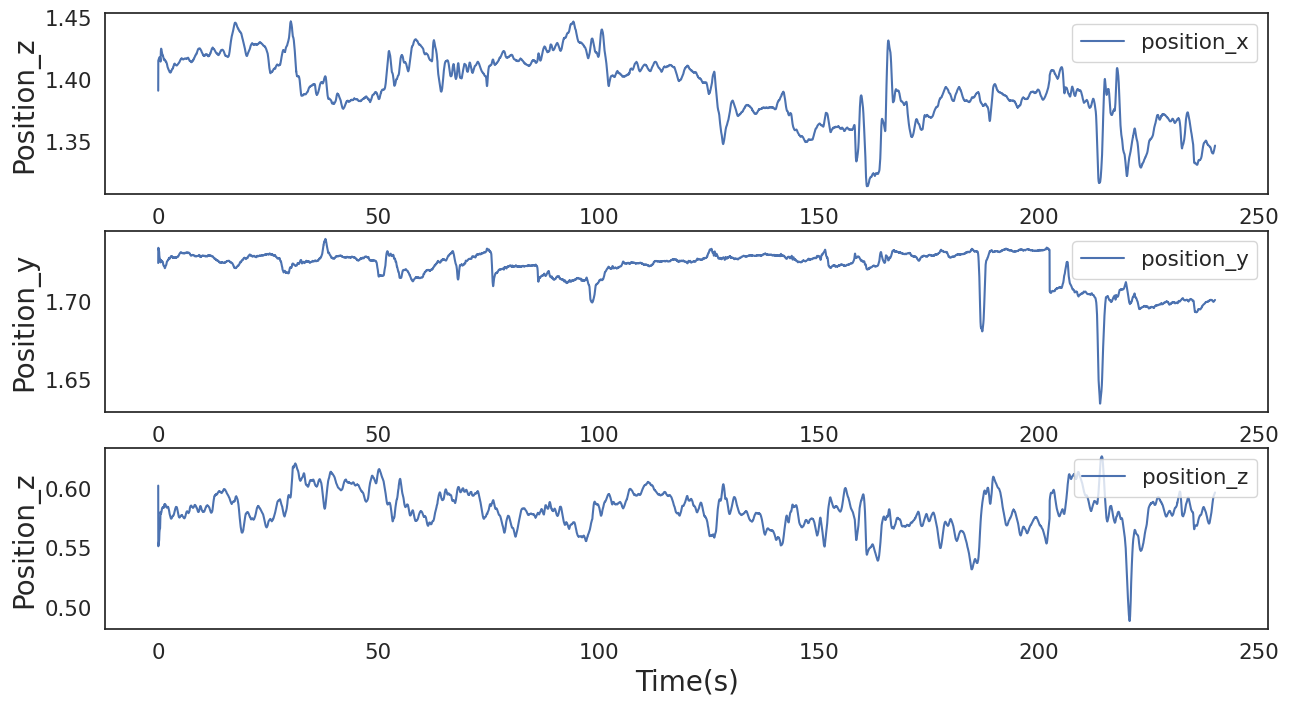

In [5]:
## Raw Head Position Data from One Sample
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.xlabel("Time(s)", fontsize=font_size)
plt.ylabel("Position_z", fontsize=font_size)
ax = sns.lineplot(x="time", y="position_x", data=d1, label='position_x')

plt.subplot(3, 1, 2)
plt.xlabel("Time(s)", fontsize=font_size)
plt.ylabel("Position_y", fontsize=font_size)
ax = sns.lineplot(x="time", y="position_y", data=d2,  label='position_y')

plt.subplot(3, 1, 3)
plt.xlabel("Time(s)", fontsize=font_size)
plt.ylabel("Position_z", fontsize=font_size)
ax = sns.lineplot(x="time", y="position_z", data=d3,  label='position_z')

plt.legend(loc="upper right")
plt.savefig('./fig_head_position.jpg')

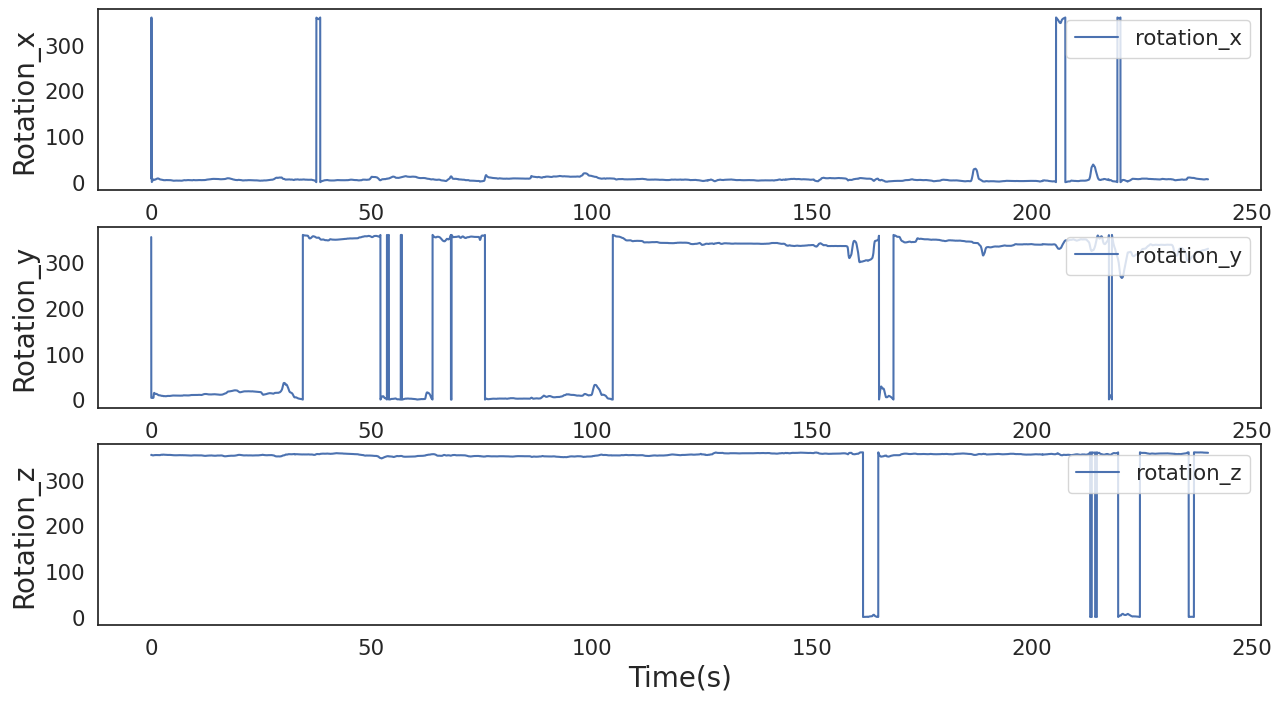

In [6]:
## Raw Head Rotation Data from One Sample
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.xlabel("Time(s)", fontsize=font_size)
plt.ylabel("Rotation_x", fontsize=font_size)
ax = sns.lineplot(x="time", y="rotation_x", data=d4,  label='rotation_x')
plt.legend(loc="upper right")

plt.subplot(3, 1, 2)
plt.xlabel("Time(s)", fontsize=font_size)
plt.ylabel("Rotation_y", fontsize=font_size)
ax = sns.lineplot(x="time", y="rotation_y", data=d5,  label='rotation_y')
plt.legend(loc="upper right")

plt.subplot(3, 1, 3)
plt.xlabel("Time(s)", fontsize=font_size)
plt.ylabel("Rotation_z", fontsize=font_size)
ax = sns.lineplot(x="time", y="rotation_z", data=d6,  label='rotation_z')
plt.legend(loc="upper right")

plt.savefig('./fig_head_rotation.jpg')

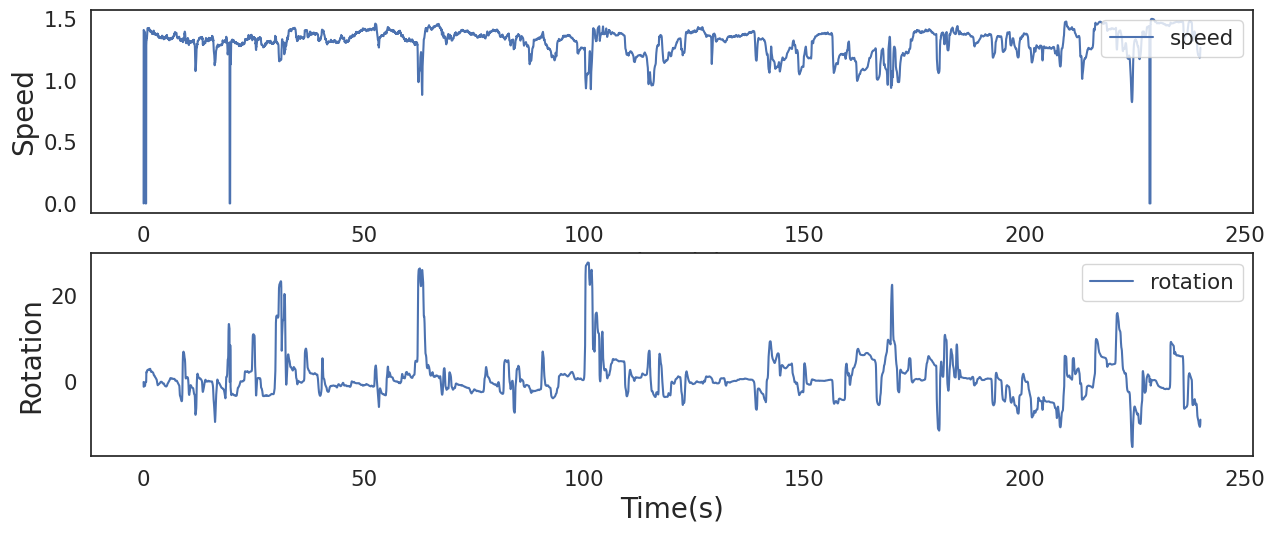

In [7]:
## ## Raw Speed and Raw Rotation from One Sample
plt.figure(figsize=(15, 5.8))

x = one_sample.Steam.rawSpeed.Time
d1 = {"time": x, "speed": list(one_sample.Steam.rawSpeed.Speed)}
d1 = pd.DataFrame(d1)
d2 = {"time": x, "rotation": list(one_sample.Steam.rawRotation.Rotation)}
d2 = pd.DataFrame(d2)

plt.subplot(2, 1, 1)
plt.xlabel("Time(s)", fontsize=font_size)
plt.ylabel("Speed", fontsize=font_size)
ax = sns.lineplot(x="time", y="speed", data=d1, label='speed')
plt.legend(loc="upper right")

plt.subplot(2, 1, 2)
plt.xlabel("Time(s)", fontsize=font_size)
plt.ylabel("Rotation", fontsize=font_size)
ax = sns.lineplot(x="time", y="rotation", data=d2,  label='rotation')
plt.legend(loc="upper right")

plt.savefig('./fig_speed_rotation.jpg')

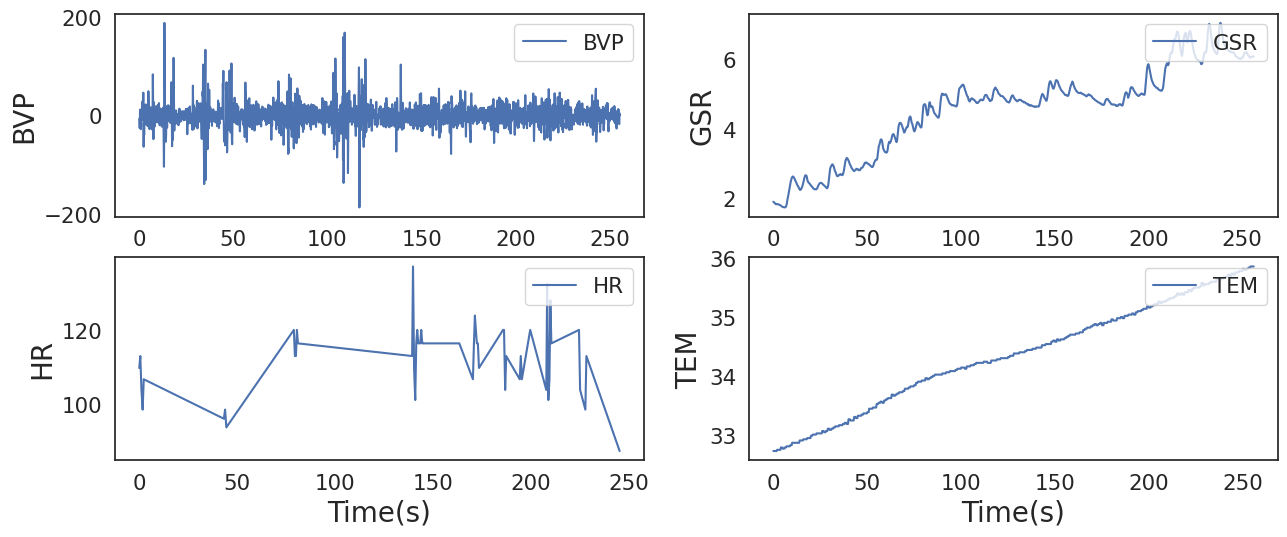

In [8]:
## Biosignal Data from One Sample
plt.figure(figsize=(15, 5.8))
d1 = {"time": one_sample.Empatica.BVP.E4_Time - one_sample.Empatica.BVP.E4_Time[0], "BVP": list(one_sample.Empatica.BVP.BVP)}
d1 = pd.DataFrame(d1)
d2 = {"time": one_sample.Empatica.GSR.E4_Time - one_sample.Empatica.GSR.E4_Time[0], "GSR": list(one_sample.Empatica.GSR.GSR)}
d2 = pd.DataFrame(d2)
d3 = {"time": one_sample.Empatica.HR.E4_Time - one_sample.Empatica.HR.E4_Time[0], "HR": list(one_sample.Empatica.HR.HR)}
d3 = pd.DataFrame(d3)
d4 = {"time": one_sample.Empatica.TEM.E4_Time - one_sample.Empatica.TEM.E4_Time[0], "TEM": list(one_sample.Empatica.TEM.TEM)}
d4 = pd.DataFrame(d4)

plt.subplot(2, 2, 1)
plt.xlabel("Time(s)", fontsize=font_size)
plt.ylabel("BVP", fontsize=font_size)
ax = sns.lineplot(x="time", y="BVP", data=d1, label='BVP')
plt.legend(loc="upper right")

plt.subplot(2, 2, 2)
plt.xlabel("Time(s)", fontsize=font_size)
plt.ylabel("GSR", fontsize=font_size)
ax = sns.lineplot(x="time", y="GSR", data=d2,  label='GSR')
plt.legend(loc="upper right")

plt.subplot(2, 2, 3)
plt.xlabel("Time(s)", fontsize=font_size)
plt.ylabel("HR", fontsize=font_size)
ax = sns.lineplot(x="time", y="HR", data=d3,  label='HR')
plt.legend(loc="upper right")

plt.subplot(2, 2, 4)
plt.xlabel("Time(s)", fontsize=font_size)
plt.ylabel("TEM", fontsize=font_size)
ax = sns.lineplot(x="time", y="TEM", data=d4,  label='TEM')
plt.legend(loc="upper right")

plt.savefig('./fig_biosignal.jpg')